# Inductor Project
---------------

The following method is the theoretical process for determining the unknowns needed to build an
inductor.
1. Initially a fill factor for the window area above “kfill” must be chosen in the range: 0.01 to
0.8. This is the ratio of copper area to the window area.
2. The Number of turns can be determined by considering the cross sectional area of the
wire and the proportion (kfill) of the window area occupied by copper:
𝑁 =
𝐴𝑟𝑒𝑎 𝑜𝑓 𝑤𝑖𝑛𝑑𝑜𝑤 ∗ 𝑘𝑓𝑖𝑙𝑙  /
𝐶𝑟𝑜𝑠𝑠 𝑠𝑒𝑐𝑡𝑖𝑜𝑛𝑎𝑙 𝐴𝑟𝑒𝑎 𝑜𝑓 𝑡ℎ𝑒 𝑤𝑖𝑟𝑒
3. Decide on the operating flux density for your inductor by considering the magnetization
curve of the material.
4. Determine the airgap length by considering the MMF’s around the loop of your magnetic
equivalent circuit.
5. Find the total flux in the core by using alternate definitions for flux linkage of the coil:
𝜆 = 𝑁∅ = 𝐿𝑖
6. From the flux the cross section area of the core can be calculated in order to calculate
depth and finally the number of laminations needed:
𝐸𝑓𝑓𝑒𝑐𝑡𝑖𝑣𝑒 𝐶𝑟𝑜𝑠𝑠 𝑠𝑒𝑐𝑡𝑖𝑜𝑛𝑎𝑙 𝐴𝑟𝑒𝑎 𝑜𝑓 𝐶𝑜𝑟𝑒 =
∅
𝐵
Note: The area above is the effective area of the ferromagnetic material required. This
differs from the actual core area below, by the stacking factor.
7. The actual depth of the core can be calculated based on the actual core area and width.
8. The number of laminations can now be calculated on the basis of the lamination
thickness and actual core depth.
𝑁𝑜. 𝐿𝑎𝑚𝑖𝑛𝑎𝑡𝑖𝑜𝑛𝑠 =
𝐷𝑒𝑝𝑡ℎ
𝑇ℎ𝑖𝑐𝑘𝑛𝑒𝑠𝑠 𝑜𝑓 𝐿𝑎𝑚𝑖𝑛𝑎𝑡𝑖𝑜𝑛𝑠
9. There are infinite permutations of the parameters for the design. Please consider the
practicality of your design. i.e. 100000 turns or 30 laminations just won’t work! It is
recommended to use excel or Matlab to run through several design iterations using the
step outlined above.

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
kfill = np.linspace(0.01,0.8,100)
area_of_window = (9.5/1000)*(28/1000)
area_of_wire = np.pi*(0.45/2000)**2
n_turns = np.divide(np.multiply(area_of_window,kfill),area_of_wire)

In [28]:
n_turns

array([   16.72502316,    30.07125375,    43.41748435,    56.76371495,
          70.10994555,    83.45617615,    96.80240675,   110.14863735,
         123.49486795,   136.84109855,   150.18732914,   163.53355974,
         176.87979034,   190.22602094,   203.57225154,   216.91848214,
         230.26471274,   243.61094334,   256.95717394,   270.30340453,
         283.64963513,   296.99586573,   310.34209633,   323.68832693,
         337.03455753,   350.38078813,   363.72701873,   377.07324932,
         390.41947992,   403.76571052,   417.11194112,   430.45817172,
         443.80440232,   457.15063292,   470.49686352,   483.84309412,
         497.18932471,   510.53555531,   523.88178591,   537.22801651,
         550.57424711,   563.92047771,   577.26670831,   590.61293891,
         603.95916951,   617.3054001 ,   630.6516307 ,   643.9978613 ,
         657.3440919 ,   670.6903225 ,   684.0365531 ,   697.3827837 ,
         710.7290143 ,   724.0752449 ,   737.42147549,   750.76770609,
      

In [49]:
bh_curve = pd.read_csv("bhcurve.csv")

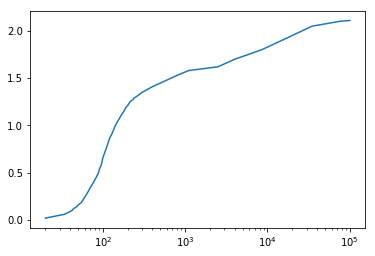

In [50]:
b_values = bh_curve['B'].values
h_values = bh_curve['H'].values
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xscale('log')
ax.plot(h_values,b_values)
plt.show()

In [138]:
#choosing B to be 0.7 because the response is linear around it
b = 0.7
h = 105
mew = np.divide(b,h)

In [139]:
i = 1
mmf = np.multiply(n_turns,i)

In [140]:
len_of_core = 122.5/1000
l_gap = []

u0 = 4*np.pi*(10**(-7))
r1 = u0*i*len_of_core/(2*mew) #lc*u0/uc
t = np.divide(u0*i,2*b) #u0*i/b
r2 = np.multiply(t,n_turns) #u0*N*I/b

l_gap = np.subtract(r2,r1)
    
l_gap

array([  6.93398535e-06,   3.08930825e-05,   5.48521796e-05,
         7.88112768e-05,   1.02770374e-04,   1.26729471e-04,
         1.50688568e-04,   1.74647665e-04,   1.98606763e-04,
         2.22565860e-04,   2.46524957e-04,   2.70484054e-04,
         2.94443151e-04,   3.18402248e-04,   3.42361345e-04,
         3.66320443e-04,   3.90279540e-04,   4.14238637e-04,
         4.38197734e-04,   4.62156831e-04,   4.86115928e-04,
         5.10075025e-04,   5.34034123e-04,   5.57993220e-04,
         5.81952317e-04,   6.05911414e-04,   6.29870511e-04,
         6.53829608e-04,   6.77788705e-04,   7.01747803e-04,
         7.25706900e-04,   7.49665997e-04,   7.73625094e-04,
         7.97584191e-04,   8.21543288e-04,   8.45502385e-04,
         8.69461483e-04,   8.93420580e-04,   9.17379677e-04,
         9.41338774e-04,   9.65297871e-04,   9.89256968e-04,
         1.01321607e-03,   1.03717516e-03,   1.06113426e-03,
         1.08509336e-03,   1.10905245e-03,   1.13301155e-03,
         1.15697065e-03,

In [141]:
inductance = 5.5/(50*2*np.pi)
flux = np.divide(inductance*1,n_turns)
eff_x_area_core = np.divide(flux,b)

In [142]:
depths = np.divide(eff_x_area_core,9.5/1000)

In [143]:
num_lamin = np.divide(depths,0.5/1000)
num_lamin

array([ 314.81429137,  175.09334183,  121.27087488,   92.75778228,
         75.10027674,   63.09031345,   54.39199798,   47.80155651,
         42.63558802,   38.47730228,   35.05805944,   32.19691616,
         29.76754044,   27.67905404,   25.86441066,   24.27306452,
         22.86618844,   21.61346383,   20.49087104,   19.47913428,
         18.56260563,   17.72844986,   16.96603965,   16.26650044,
         15.62236333,   15.02729742,   14.475901  ,   13.96353712,
         13.48620288,   13.04042462,   12.62317329,   12.23179547,
         11.86395693,   11.51759603,   11.19088504,   10.88219792,
         10.5900832 ,   10.31324118,   10.05050463,    9.80082228,
          9.56324481,    9.33691278,    9.12104619,    8.9149356 ,
          8.71793422,    8.52945124,    8.34894585,    8.17592205,
          8.00992414,    7.85053271,    7.69736104,    7.55005205,
          7.40827546,    7.27172535,    7.14011795,    7.01318966,
          6.8906953 ,    6.77240653,    6.65811041,    6.54760

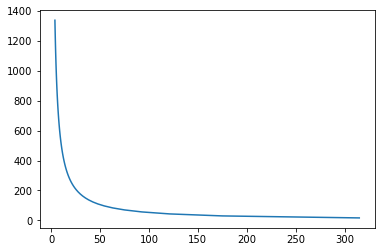

In [144]:
plt.plot(num_lamin,n_turns)
plt.show()

In [151]:
result = num_lamin[0]*n_turns[0]
for x in range(len(num_lamin)):
    nxt = num_lamin[i]*n_turns[i]
    if nxt < result:
        result = nxt
        print(x)
        
resultindex = 29
        
print("Turns:",n_turns[resultindex],"; Laminations:",num_lamin[resultindex],"; Gap Length:",l_gap[resultindex])

# print("Optimal result of turns (maybe)=", n_turns, "with gap length =")
# result

Turns: 403.765710522 ; Laminations: 13.0404246215 ; Gap Length: 0.000701747802538


In [130]:
results = []
for i in range(len(num_lamin)):
    print("min(lamin) =",min(num_lamin[i]),"; turns = ",n_turns[i])
    results.append((min(num_lamin[i]))*(n_turns[i]))

test = results.index(min(results))
print("Optimal result of turns (maybe)=", n_turns[test], "with gap length =") #min(np.abs(l_gap[test])),"B =",
      #b_values[l_gap[test].tolist().index(min(np.abs(l_gap[test])))])

TypeError: 'numpy.float64' object is not iterable

### When I didn't know what I was doing...

In [131]:
len_of_core = 122.5/1000
depth = np.divide(np.linspace(0.5,50,100),1000) #0.5mm ->5cm
x_area_core = np.multiply((9.5/1000),depth)
#x_area_core = (9.5/1000)*(20/1000) #np.multiply((9.5/1000),depth)
len(x_area_core)

100

In [132]:
flux = []
for x_area in x_area_core:
    flux.append(np.multiply(b_values,x_area))
# flux = np.multiply(b_values,x_area_core)
#len(mmf) = 100
#len(flux) = 100
# flux = 2D array 100,61
len(flux)


# The 2D flux array has all the flux values for a different 
# cross sectional area at each element. Each element of these arrays 
# is then divided from each mmf to find the total reluctance for 
# each cross sectional area for all possible values along the b-h curve.
# This reslts in a 3D array holding values for every area, every b values
# and every mmf.

i = 0
j = 0
total_r = [[] for i in range(len(x_area_core))]
for an_area in flux:
    #total_r[j].append([])
    for a_flux in an_area:
        #print("i:",i,"j",j)
        #print("total_r[j]:",len(total_r[j]),"total_r:",len(total_r))
        total_r[j].append(np.divide(mmf,a_flux)) #using one flux val for now     flux[j][i]
        i+=1
    j+=1
    i=0

In [133]:
print("total_r[j]:",len(total_r[0]),"total_r:",len(total_r),"el:",len(total_r[0][1]))
#print(total_r[0:10][0:3][:])

total_r[j]: 61 total_r: 100 el: 100


In [ ]:
r_gap =[[] for i in range(len(x_area_core))]

i = 0
j = 0
for an_area in flux:
    for a_flux in an_area:
        r_gap[j].append(np.subtract(total_r[i][j],(len_of_core)/(mew[i]*x_area_core[j])))
        i+=1
    j+=1
    
#l_gap = r_gap*4*np.pi*10e-7*x_area_core
# l_gap